In [11]:
import tensorflow as tf
import numpy as np
import time
from matplotlib import pyplot as PLT
import matplotlib.animation as animation
from scipy import misc
from PIL import Image
from VGG import *
from utils import *
from train import *

In [13]:
# Might need to run two times. Please rerun it until you see a panel above the image in the chunk below.
%matplotlib nbagg
%matplotlib nbagg

<IPython.core.display.Javascript object>


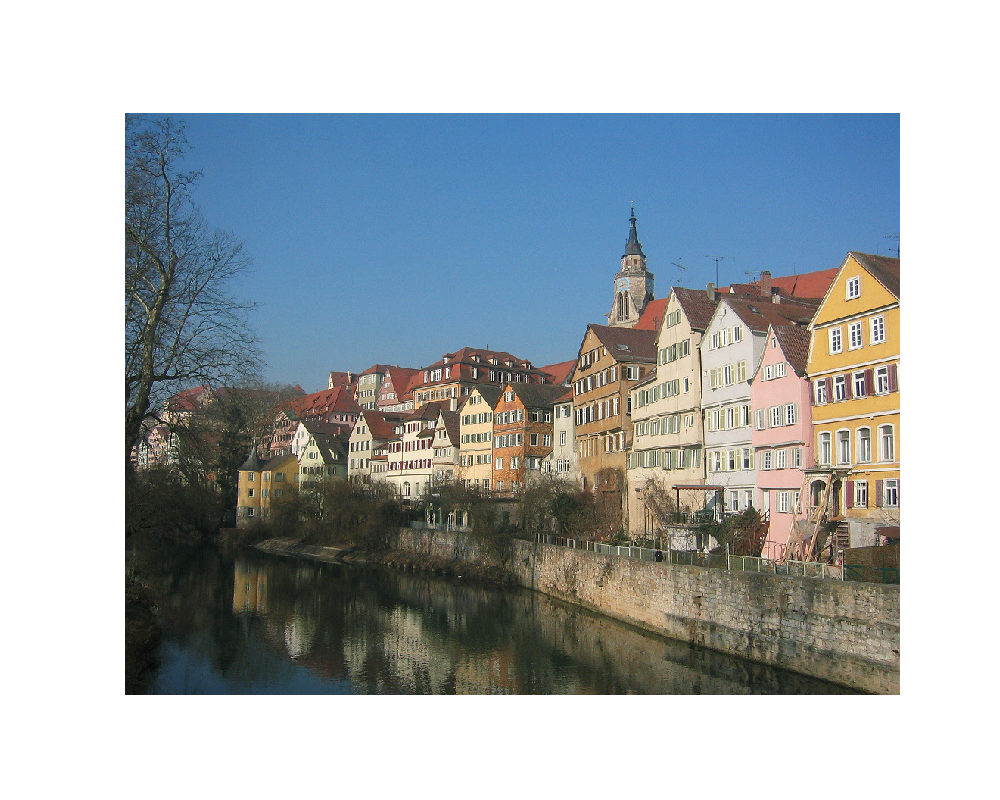

Content Image Shape:  (768, 1024, 3)


In [14]:
a = ImageFunction().imageRead('./data/Content.jpg', height = 1024, width = 768, original = False)
ImageFunction().imageShow(a)
print('Content Image Shape: ',a.shape)

<IPython.core.display.Javascript object>


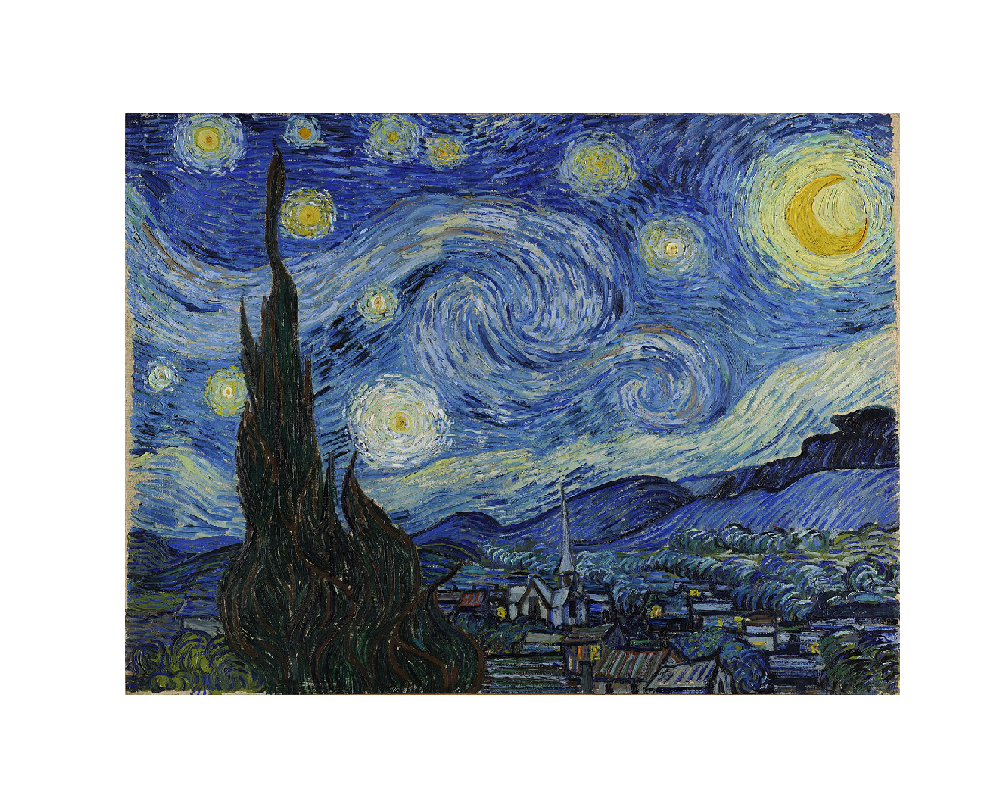

Style Image Shape:  (768, 1024, 3)


In [6]:
b = ImageFunction().imageRead('./data/Style.jpg', height = 1024, width = 768, original = False)
ImageFunction().imageShow(b)
print('Style Image Shape: ',b.shape)

In [15]:
#Set parameters for training, these parameters(except for learning rate) comes from the original paper.
content_layers = ['relu4_2']
style_layers = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1']
wl = 1/5
learning_rate = 1e1
network = './pretrained_model/imagenet-vgg-verydeep-19.mat'

In [17]:
# Let's construct our network.
Neural = Neural_Style(network = network,input_content_path = './data/Content.jpg', 
                              input_style_path='./data/Style.jpg', rand_seed=222,
                              content_layers = content_layers, style_layers = style_layers,
                              wl = wl)

In [8]:
# Let's start training.

tf.reset_default_graph()
alpha = 1e1
beta = 1e3
iterations = 1000
scale = 0.25
init = 'Content'

image,loss_hist,video = Neural.train(alpha = alpha, beta = beta, learning_rate = learning_rate,iterations = iterations,scale=scale,
                                    init = init)

Total Loss:  213326624365.99564
iteration 0 starts
--- 6.581225872039795 seconds ---
Total Loss:  17957016131.836643
iteration 50 starts
--- 139.67343401908875 seconds ---
Total Loss:  14729391621.478712
iteration 100 starts
--- 254.9416220188141 seconds ---
Total Loss:  14034824182.40396
iteration 150 starts
--- 364.4255590438843 seconds ---
Total Loss:  13740409041.81387
iteration 200 starts
--- 472.6333079338074 seconds ---
Total Loss:  13506000546.672207
iteration 250 starts
--- 580.6603198051453 seconds ---
Total Loss:  13517221358.36682
iteration 300 starts
--- 692.559895992279 seconds ---
Total Loss:  13410433404.680569
iteration 350 starts
--- 800.3511600494385 seconds ---
Total Loss:  13528147500.241596
iteration 400 starts
--- 910.17902302742 seconds ---
Total Loss:  13226013527.16707
iteration 450 starts
--- 1019.4234659671783 seconds ---
Total Loss:  13734022764.741724
iteration 500 starts
--- 1127.6607389450073 seconds ---
Total Loss:  13207486050.548788
iteration 550 star

<IPython.core.display.Javascript object>


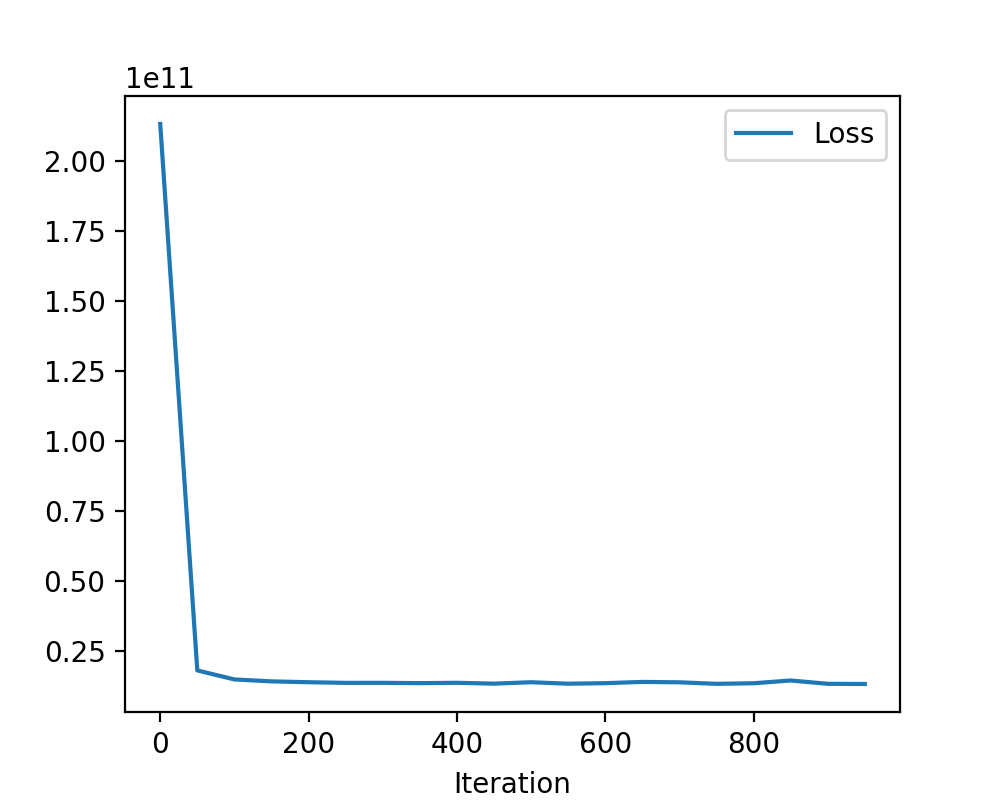

In [9]:
# Plot training loss
PLT.figure(figsize=(5,4))
PLT.plot(np.arange(0,1000,step=50),loss_hist,label="Loss")
PLT.xlabel("Iteration")
PLT.legend()
PLT.show()

<IPython.core.display.Javascript object>


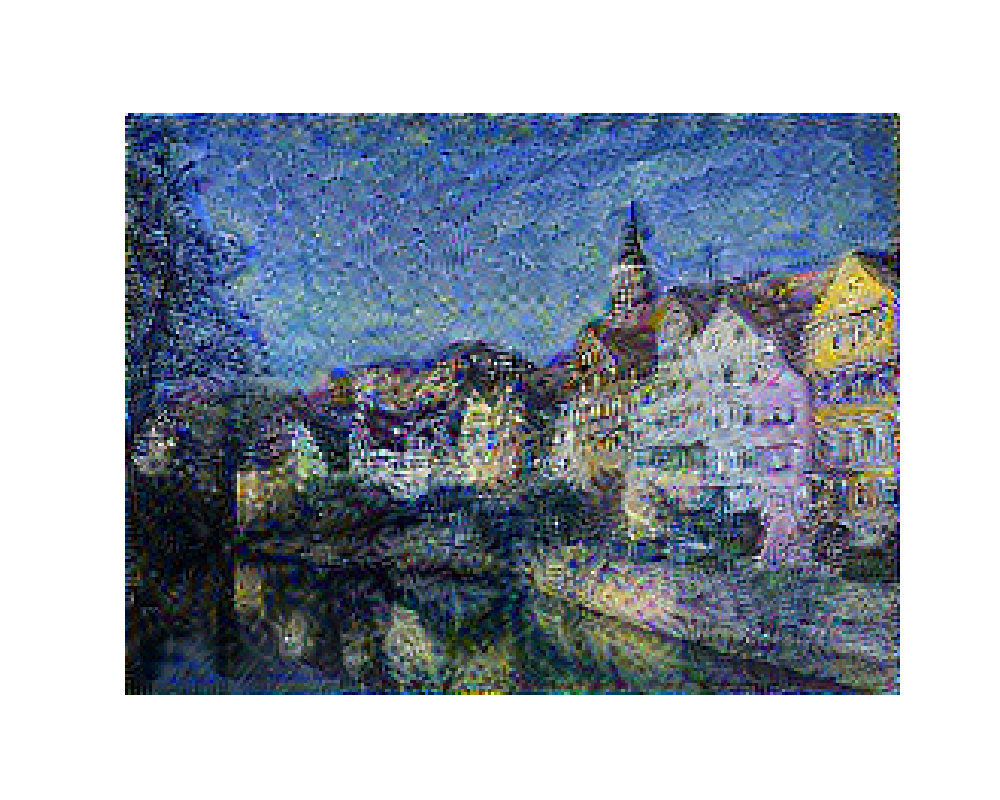

In [10]:
#Let's visualize the output image.
PLT.figure(figsize=(5,4))
PLT.imshow(image)
PLT.axis('off')
PLT.show()

<IPython.core.display.Javascript object>


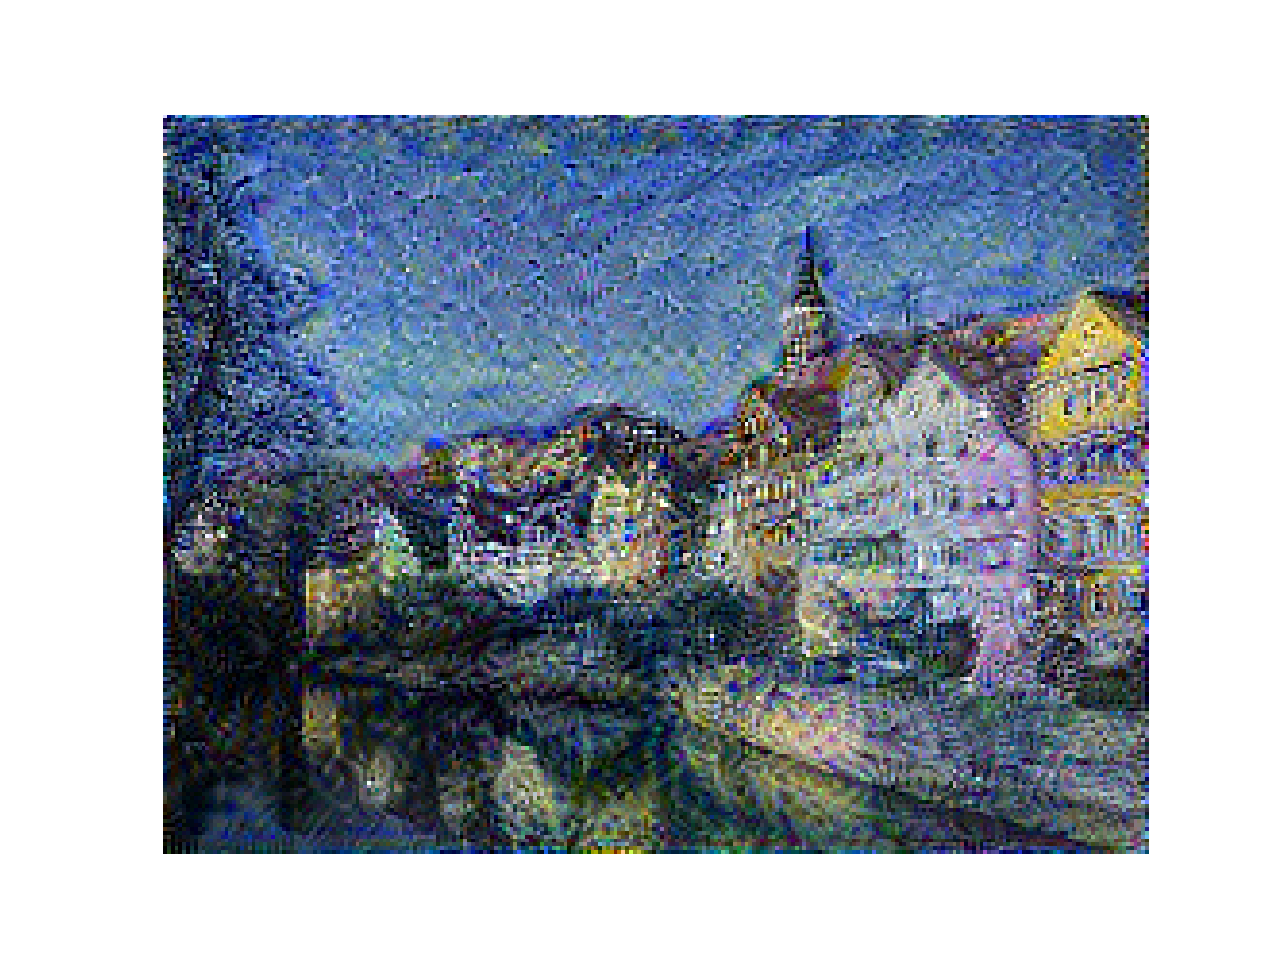

In [23]:
# Let's check out the whole process how the output image is created.
plot_animation(video)

In [24]:
# Let's save the image to output.
img = Image.fromarray(image, 'RGB')
img.save("./output/output.jpg")